In [1]:
# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline


In [2]:
# 2️⃣ Load Dataset
# Try latin-1 first
df = pd.read_csv("Agora.csv", encoding="latin-1")

In [3]:
df

,Vendor,Category,Item,Item Description,Price,Origin,Destination,Rating,Remarks
0,CheapPayTV,Services/Hacking,12 Month HuluPlus gift Code,12-Month HuluPlus Codes for $25. They are wort...,0.05027025666666667 BTC,Torland,NaN,4.96/5,NaN
1,CheapPayTV,Services/Hacking,Pay TV Sky UK Sky Germany HD TV and much mor...,Hi we offer a World Wide CCcam Service for En...,0.152419585 BTC,Torland,NaN,4.96/5,NaN
2,KryptykOG,Services/Hacking,OFFICIAL Account Creator Extreme 4.2,Tagged Submission Fix Bebo Submission Fix Adju...,0.007000000000000005 BTC,Torland,NaN,4.93/5,NaN
3,cyberzen,Services/Hacking,VPN > TOR > SOCK TUTORIAL,How to setup a VPN > TOR > SOCK super safe enc...,0.019016783532494728 BTC,NaN,NaN,4.89/5,NaN
4,businessdude,Services/Hacking,Facebook hacking guide,. This guide will teach you how to hack Faceb...,0.062018073963963936 BTC,Torland,NaN,4.88/5,NaN
...,...,...,...,...,...,...,...,...,...
109684,gonz324,Drugs/Opioids/Opium,1 gr purified Opium,This Listing is for a gramm of redefined Opium...,0.14363729 BTC,Germany,NaN,4.91/5,NaN
109685,cheqdropz,Weapons/Fireworks,Shipping Ticket,in order for me to ship one of the guns you bo...,0.08680555 BTC,USA,NaN,[0 deals],NaN
109686,SnowQueen,Drugs/Opioids/Opium,0.50 GRAMS #4 White Afghani Heroin - FULL ESCROW,0.50 grams #4 White Afghani Heroin SnowQueen...,0.33641201 BTC,Canada,Worldwide,[0 deals],NaN
109687,SnowQueen,Drugs/Opioids/Opium,1.0 GRAMS #4 White Afghani Heroin - FULL ESCROW,1.0 grams #4 White Afghani Heroin SnowQueen ...,0.61165820 BTC,Canada,Worldwide,[0 deals],NaN


**Data Understanding**

In [4]:
print(df.shape)

(109689, 9)


In [5]:
df.head()

,Vendor,Category,Item,Item Description,Price,Origin,Destination,Rating,Remarks
0,CheapPayTV,Services/Hacking,12 Month HuluPlus gift Code,12-Month HuluPlus Codes for $25. They are wort...,0.05027025666666667 BTC,Torland,NaN,4.96/5,NaN
1,CheapPayTV,Services/Hacking,Pay TV Sky UK Sky Germany HD TV and much mor...,Hi we offer a World Wide CCcam Service for En...,0.152419585 BTC,Torland,NaN,4.96/5,NaN
2,KryptykOG,Services/Hacking,OFFICIAL Account Creator Extreme 4.2,Tagged Submission Fix Bebo Submission Fix Adju...,0.007000000000000005 BTC,Torland,NaN,4.93/5,NaN
3,cyberzen,Services/Hacking,VPN > TOR > SOCK TUTORIAL,How to setup a VPN > TOR > SOCK super safe enc...,0.019016783532494728 BTC,NaN,NaN,4.89/5,NaN
4,businessdude,Services/Hacking,Facebook hacking guide,. This guide will teach you how to hack Faceb...,0.062018073963963936 BTC,Torland,NaN,4.88/5,NaN


In [6]:
# ✅Check current column names
print(df.columns)

Index(['Vendor', ' Category', ' Item', ' Item Description', ' Price',
       ' Origin', ' Destination', ' Rating', ' Remarks'],
      dtype='object')


In [7]:
# Remove leading/trailing spaces from all column names
df.columns = df.columns.str.strip()

In [8]:
# Verify column names again
print(df.columns)

Index(['Vendor', 'Category', 'Item', 'Item Description', 'Price', 'Origin',
       'Destination', 'Rating', 'Remarks'],
      dtype='object')


In [9]:
# Info about dtypes and nulls
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109689 entries, 0 to 109688
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Vendor            109689 non-null  object
 1   Category          109689 non-null  object
 2   Item              109685 non-null  object
 3   Item Description  109662 non-null  object
 4   Price             109684 non-null  object
 5   Origin            99807 non-null   object
 6   Destination       60528 non-null   object
 7   Rating            109674 non-null  object
 8   Remarks           12616 non-null   object
dtypes: object(9)
memory usage: 7.5+ MB
None


**Data clean**

In [10]:
# 3️⃣ Data Cleaning
# 3.1 Price Cleaning

# Ensure Price is string and extract numeric part using regex
df['Price_clean'] = df['Price'].astype(str).str.extract(r'([0-9]+\.?[0-9]*)')[0]

# Convert extracted values to numeric (float), invalid parsing will become NaN
df['Price_clean'] = pd.to_numeric(df['Price_clean'], errors='coerce')

# Drop rows where Price_clean is NaN and reset index
df = df.dropna(subset=['Price_clean']).reset_index(drop=True)

# Quick summary statistics
print("✅ Price column cleaned")
print(df['Price_clean'].describe())

✅ Price column cleaned
count    109680.000000
mean         22.172256
std        1037.678087
min           0.000000
25%           0.123445
50%           0.383066
75%           1.332259
max      130396.089689
Name: Price_clean, dtype: float64


In [11]:
# 3.2 Rating Cleaning
df['Rating_clean'] = df['Rating'].astype(str).str.extract(r'([0-9]*\.?[0-9]+)')[0]
df['Rating_clean'] = pd.to_numeric(df['Rating_clean'], errors='coerce')
print(df['Rating_clean'].describe())

count    109672.000000
mean          4.533471
std           1.301406
min           0.000000
25%           4.860000
50%           4.969000
75%           5.000000
max          15.000000
Name: Rating_clean, dtype: float64


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109680 entries, 0 to 109679
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Vendor            109680 non-null  object 
 1   Category          109680 non-null  object 
 2   Item              109676 non-null  object 
 3   Item Description  109656 non-null  object 
 4   Price             109680 non-null  object 
 5   Origin            99806 non-null   object 
 6   Destination       60524 non-null   object 
 7   Rating            109674 non-null  object 
 8   Remarks           12615 non-null   object 
 9   Price_clean       109680 non-null  float64
 10  Rating_clean      109672 non-null  float64
dtypes: float64(2), object(9)
memory usage: 9.2+ MB


In [13]:
df.describe()

,Price_clean,Rating_clean
count,109680.000000,109672.000000
mean,22.172256,4.533471
std,1037.678087,1.301406
min,0.000000,0.000000
25%,0.123445,4.860000
50%,0.383066,4.969000
75%,1.332259,5.000000
max,130396.089689,15.000000


**find missing value**

In [14]:
# Count null values per column
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
Vendor                  0
Category                0
Item                    4
Item Description       24
Price                   0
Origin               9874
Destination         49156
Rating                  6
Remarks             97065
Price_clean             0
Rating_clean            8
dtype: int64


In [15]:
# Percentage of missing values
print("\nPercentage Missing:")
print(df.isnull().mean() * 100)


Percentage Missing:
Vendor               0.000000
Category             0.000000
Item                 0.003647
Item Description     0.021882
Price                0.000000
Origin               9.002553
Destination         44.817651
Rating               0.005470
Remarks             88.498359
Price_clean          0.000000
Rating_clean         0.007294
dtype: float64


**Handle missing value**

In [16]:
# Fill text fields with empty string
df['Item'] = df['Item'].fillna("")
df['Item Description'] = df['Item Description'].fillna("")
df['Remarks'] = df['Remarks'].fillna("")

In [17]:
# Fill categorical with 'Unknown'
df['Vendor'] = df['Vendor'].fillna("Unknown")
df['Category'] = df['Category'].fillna("Unknown")
df['Origin'] = df['Origin'].fillna("Unknown")
df['Destination'] = df['Destination'].fillna("Unknown")

**verify the cleaning**

In [18]:
# Check again after cleaning
print("\nRemaining Missing Values:")
print(df.isnull().sum())


Remaining Missing Values:
Vendor              0
Category            0
Item                0
Item Description    0
Price               0
Origin              0
Destination         0
Rating              6
Remarks             0
Price_clean         0
Rating_clean        8
dtype: int64


**EDA**

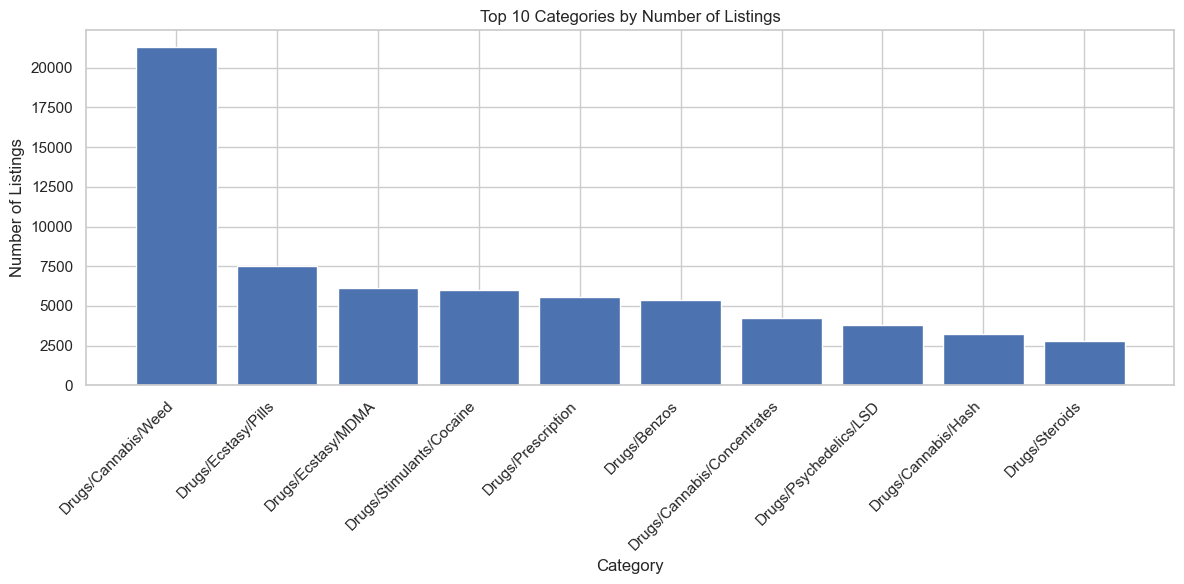

Top 10 Categories:
 Category
Drugs/Cannabis/Weed            21270
Drugs/Ecstasy/Pills             7533
Drugs/Ecstasy/MDMA              6116
Drugs/Stimulants/Cocaine        6007
Drugs/Prescription              5561
Drugs/Benzos                    5393
Drugs/Cannabis/Concentrates     4256
Drugs/Psychedelics/LSD          3775
Drugs/Cannabis/Hash             3241
Drugs/Steroids                  2779
Name: count, dtype: int64


In [19]:
# 4️⃣ EDA
# 4.1 Top 10 Categories by Listings

top_categories = df['Category'].value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_categories.index, top_categories.values)
plt.title("Top 10 Categories by Number of Listings")
plt.xlabel("Category")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Top 10 Categories:\n", top_categories)


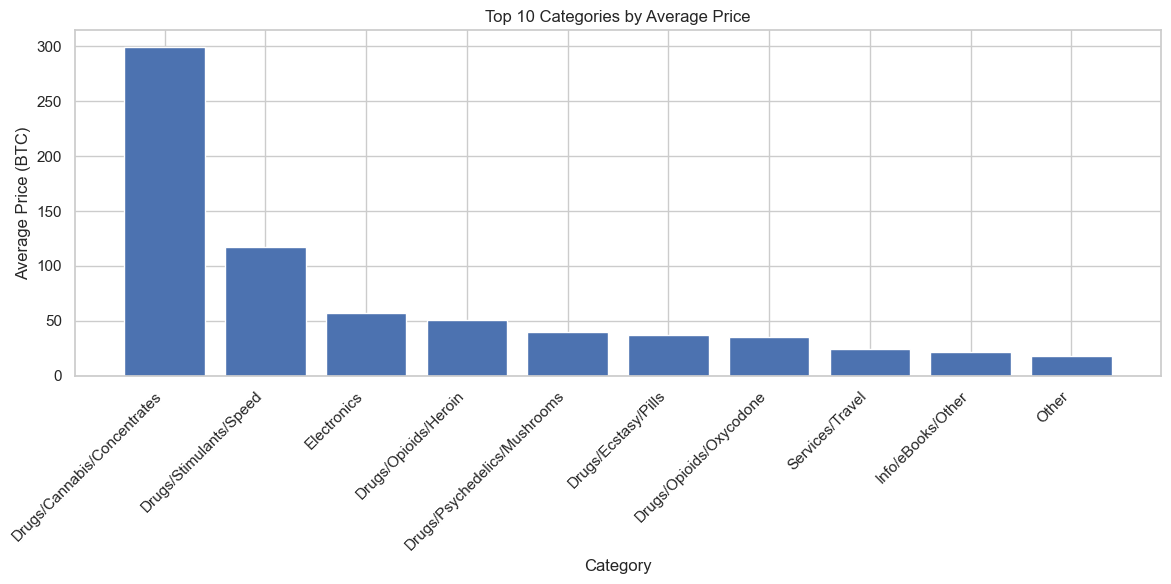

Average Price per Category:
 Category
Drugs/Cannabis/Concentrates     299.569907
Drugs/Stimulants/Speed          117.634071
Electronics                      57.070777
Drugs/Opioids/Heroin             50.319968
Drugs/Psychedelics/Mushrooms     40.074805
Drugs/Ecstasy/Pills              37.039260
Drugs/Opioids/Oxycodone          35.143099
Services/Travel                  24.112751
Info/eBooks/Other                21.748208
Other                            18.323156
Name: Price_clean, dtype: float64


In [20]:
# 4️⃣ EDA
# 4.2 Top 10 Categories by Average Price

avg_price_category = (
    df.groupby('Category')['Price_clean']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 6))
plt.bar(avg_price_category.index, avg_price_category.values)
plt.title("Top 10 Categories by Average Price")
plt.xlabel("Category")
plt.ylabel("Average Price (BTC)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Average Price per Category:\n", avg_price_category)


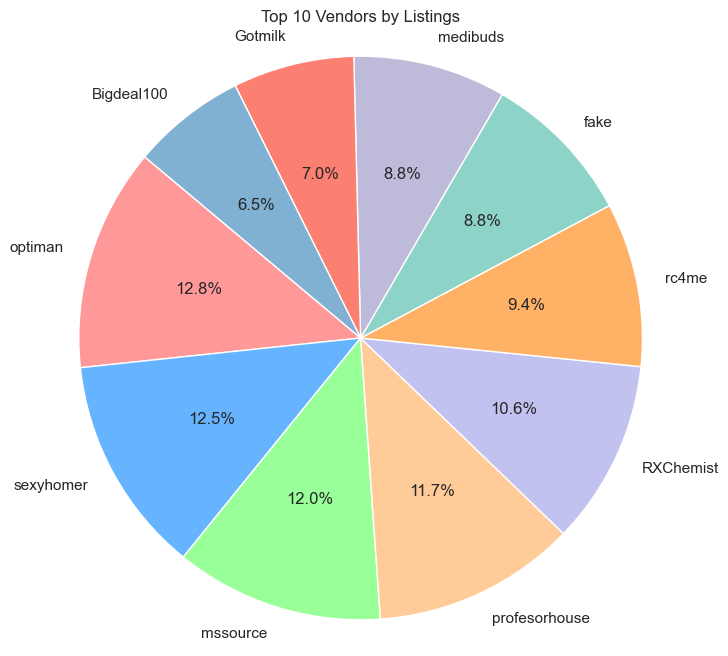

In [21]:
# 4.3 Top 10 Vendors by Listings
# Get top 10 vendors
top_vendors = df['Vendor'].value_counts().head(10)

# Define custom colors
colors = ['#FF9999','#66B3FF','#99FF99','#FFCC99','#C2C2F0','#FFB266','#8DD3C7','#BEBADA','#FB8072','#80B1D3']

# Pie chart
plt.figure(figsize=(8,8))
plt.pie(top_vendors.values, labels=top_vendors.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Top 10 Vendors by Listings")
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular
plt.show()


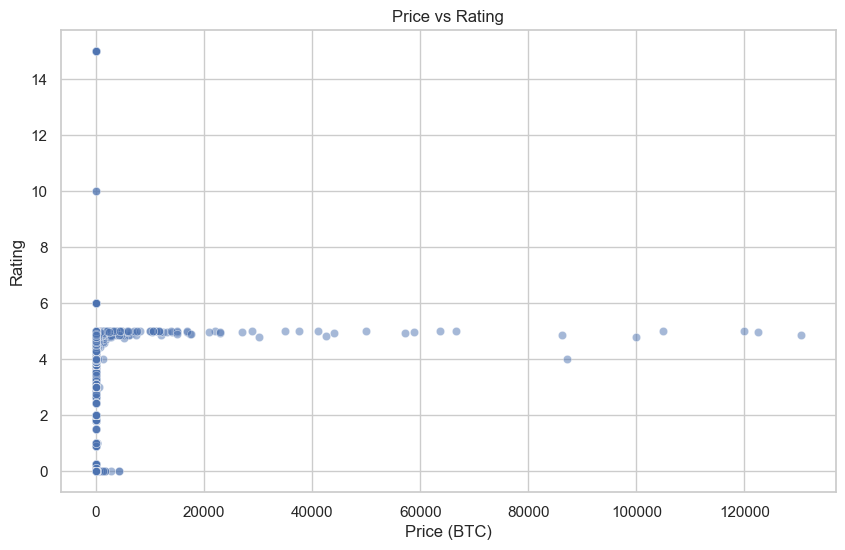

In [22]:
# 4.4 Price vs Rating
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Price_clean', y='Rating_clean', alpha=0.5)
plt.title("Price vs Rating")
plt.xlabel("Price (BTC)")
plt.ylabel("Rating")
plt.show()

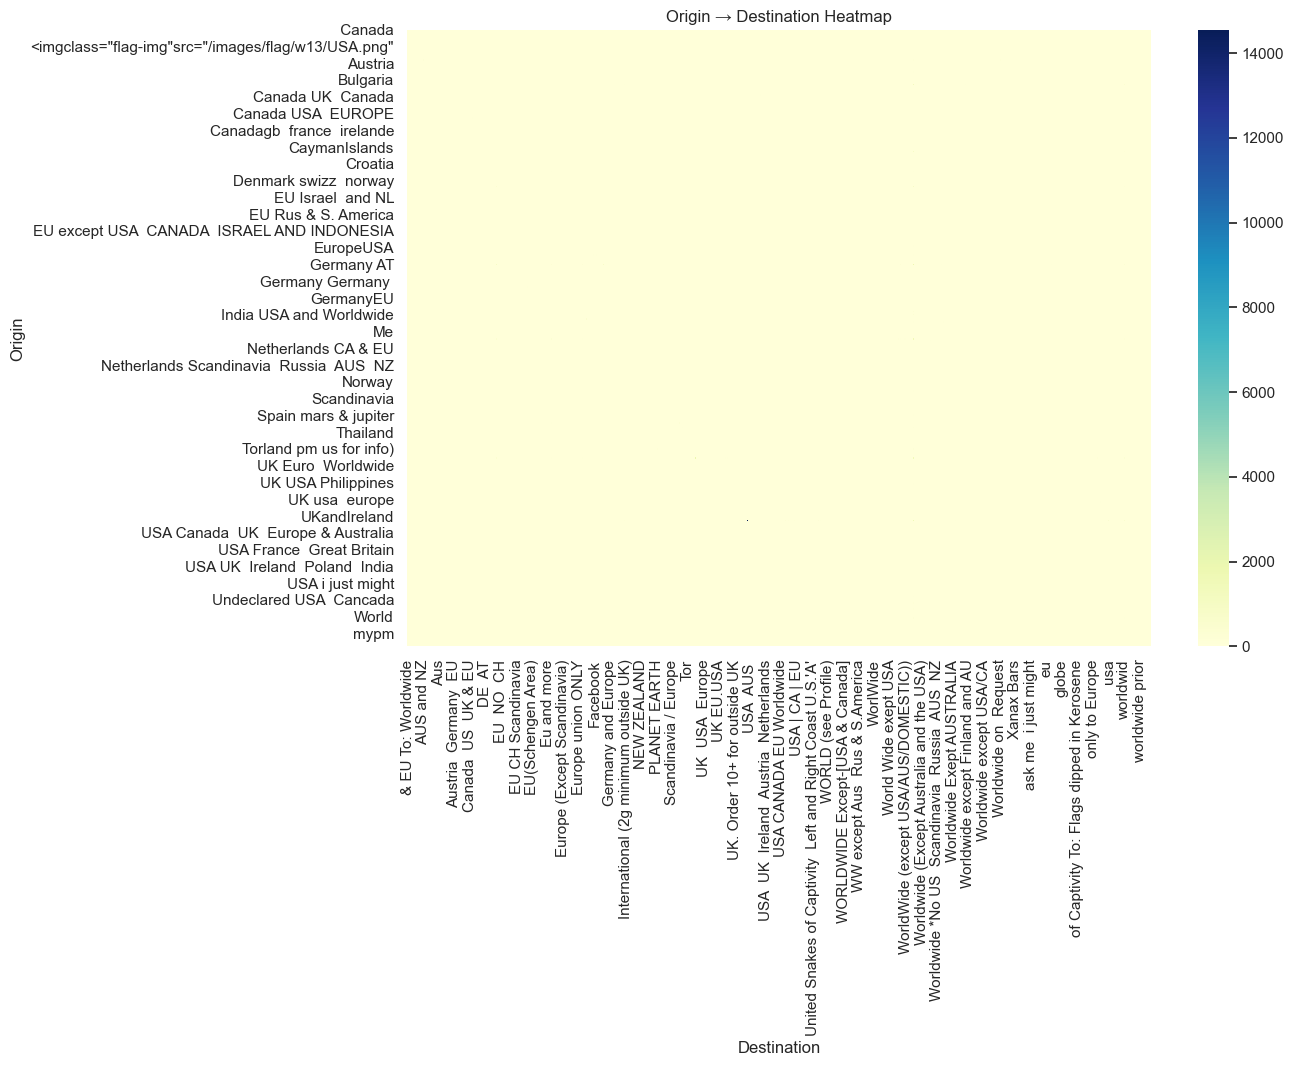

In [23]:
# 4.5 Origin → Destination Heatmap
origin_dest_counts = df.groupby(['Origin','Destination']).size().unstack(fill_value=0)
plt.figure(figsize=(12,8))
sns.heatmap(origin_dest_counts, cmap="YlGnBu")
plt.title("Origin → Destination Heatmap")
plt.show()

C:\Users\raksh\AppData\Local\Temp\ipykernel_20268\1661168611.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index,


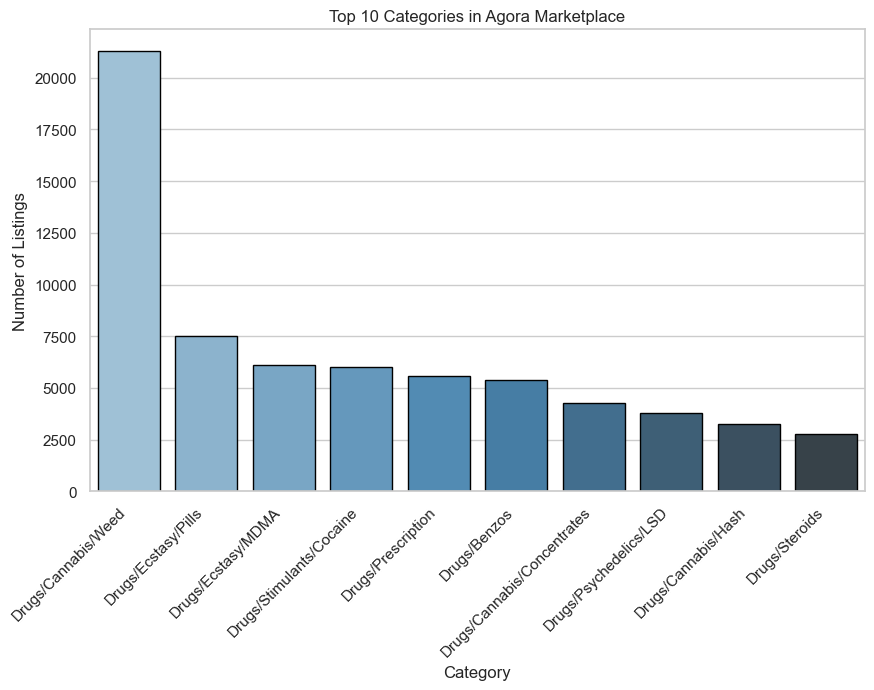

Category
Drugs/Cannabis/Weed            21270
Drugs/Ecstasy/Pills             7533
Drugs/Ecstasy/MDMA              6116
Drugs/Stimulants/Cocaine        6007
Drugs/Prescription              5561
Drugs/Benzos                    5393
Drugs/Cannabis/Concentrates     4256
Drugs/Psychedelics/LSD          3775
Drugs/Cannabis/Hash             3241
Drugs/Steroids                  2779
Name: count, dtype: int64


In [24]:
# 4.6 Top 10 categories in Marketplace
top_categories = df['Category'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_categories.index, 
            y=top_categories.values, 
            palette="Blues_d", 
            edgecolor="black")  # Added edge for consistency
plt.title("Top 10 Categories in Agora Marketplace")
plt.xlabel("Category")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45, ha='right')
plt.show()

print(top_categories)


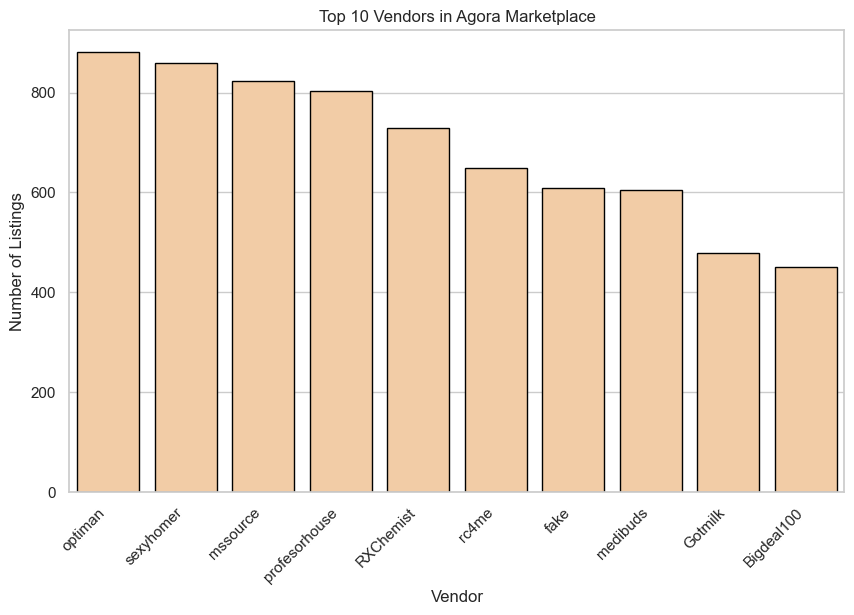

Vendor
optiman          881
sexyhomer        860
mssource         823
profesorhouse    804
RXChemist        729
rc4me            648
fake             608
medibuds         604
Gotmilk          479
Bigdeal100       451
Name: count, dtype: int64


In [25]:
# 4.7 Top 10 vendors in Marketplace
top_vendors = df['Vendor'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_vendors.index, 
            y=top_vendors.values, 
            color="#FFCC99",   # mild peach/orange shade
            edgecolor="black")
plt.title("Top 10 Vendors in Agora Marketplace")
plt.xlabel("Vendor")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45, ha='right')
plt.show()

print(top_vendors)

C:\Users\raksh\AppData\Local\Temp\ipykernel_20268\4211422542.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendor_category_counts.index,


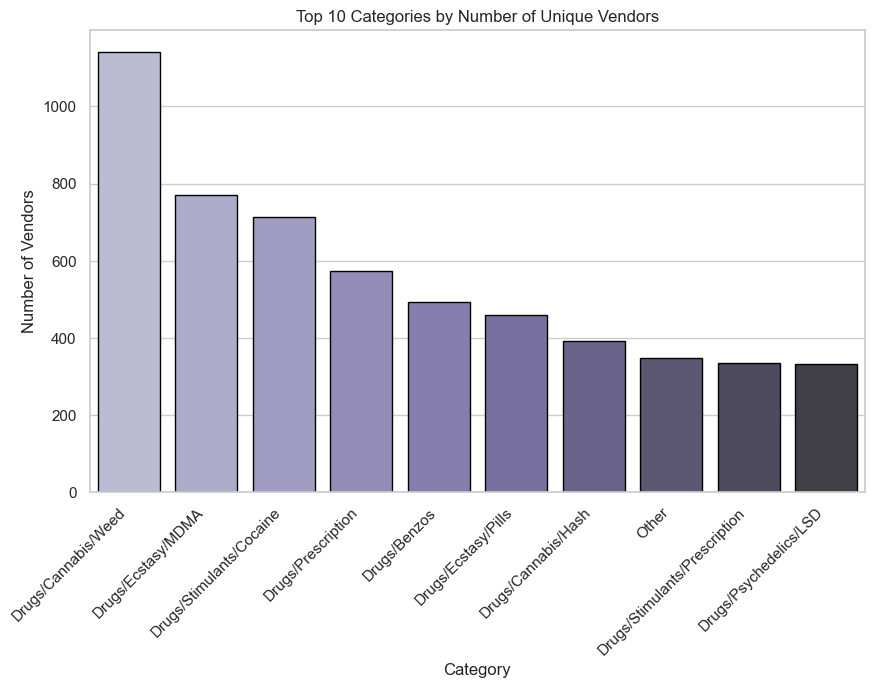

Category
Drugs/Cannabis/Weed              1141
Drugs/Ecstasy/MDMA                771
Drugs/Stimulants/Cocaine          714
Drugs/Prescription                572
Drugs/Benzos                      492
Drugs/Ecstasy/Pills               460
Drugs/Cannabis/Hash               392
Other                             347
Drugs/Stimulants/Prescription     335
Drugs/Psychedelics/LSD            333
Name: Vendor, dtype: int64


In [26]:
# 4.8 Top 10 Categories by Number of Unique Vendors
vendor_category_counts = df.groupby('Category')['Vendor'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=vendor_category_counts.index, 
            y=vendor_category_counts.values, 
            palette="Purples_d",   # Purple gradient palette
            edgecolor="black")
plt.title("Top 10 Categories by Number of Unique Vendors")
plt.xlabel("Category")
plt.ylabel("Number of Vendors")
plt.xticks(rotation=45, ha='right')
plt.show()

print(vendor_category_counts)

C:\Users\raksh\AppData\Local\Temp\ipykernel_20268\3484896679.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_vendor.index, y=avg_price_vendor.values, palette="Oranges_d")


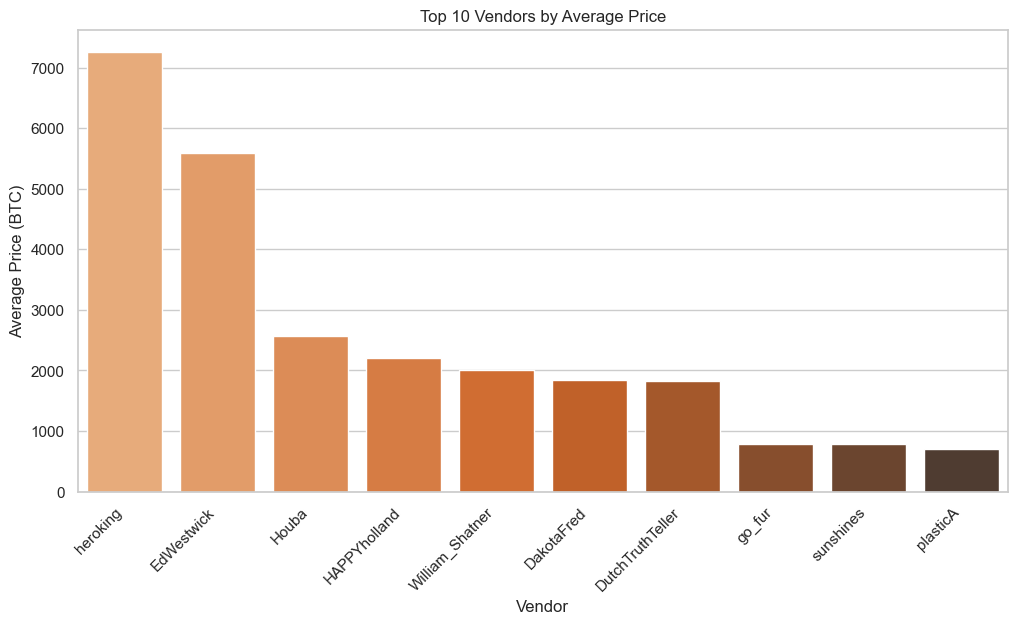

Top 10 Vendors by Average Price:
 Vendor
heroking            7261.572154
EdWestwick          5595.763927
Houba               2564.352652
HAPPYholland        2210.718951
William_Shatner     2008.151107
DakotaFred          1835.459700
DutchTruthTeller    1822.055954
go_fur               793.273309
sunshines            780.870670
plasticA             697.446213
Name: Price_clean, dtype: float64


In [27]:
# 4.9 Top 10 vendors by average price of listings
avg_price_vendor = df.groupby('Vendor')['Price_clean'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_price_vendor.index, y=avg_price_vendor.values, palette="Oranges_d")
plt.title("Top 10 Vendors by Average Price")
plt.xlabel("Vendor")
plt.ylabel("Average Price (BTC)")
plt.xticks(rotation=45, ha='right')
plt.show()

print("Top 10 Vendors by Average Price:\n", avg_price_vendor)


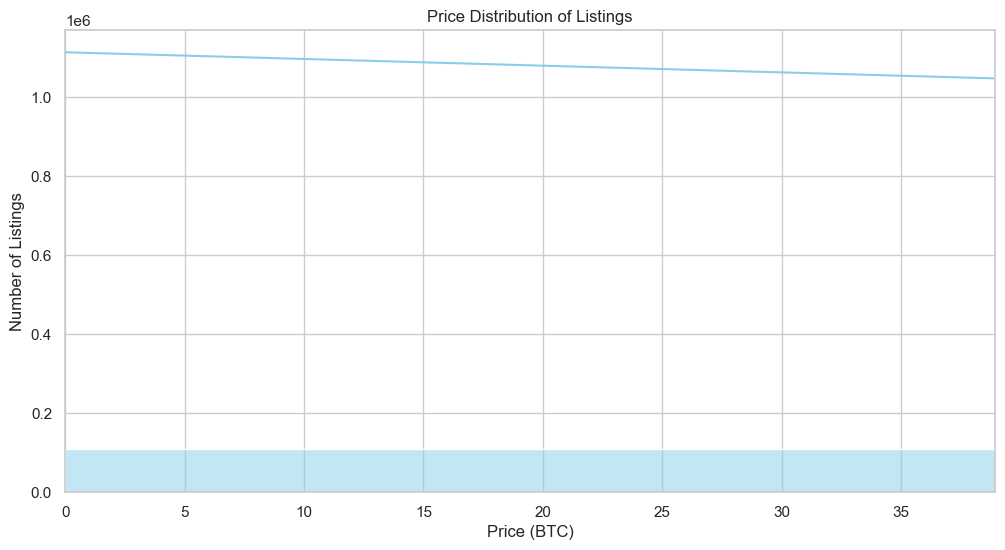

In [28]:
#4.10 price Distribution of Listings
plt.figure(figsize=(12,6))
sns.histplot(df['Price_clean'], bins=50, kde=True, color='skyblue')
plt.title("Price Distribution of Listings")
plt.xlabel("Price (BTC)")
plt.ylabel("Number of Listings")
plt.xlim(0, df['Price_clean'].quantile(0.99))  # Limit x-axis to 99th percentile for clarity
plt.show()


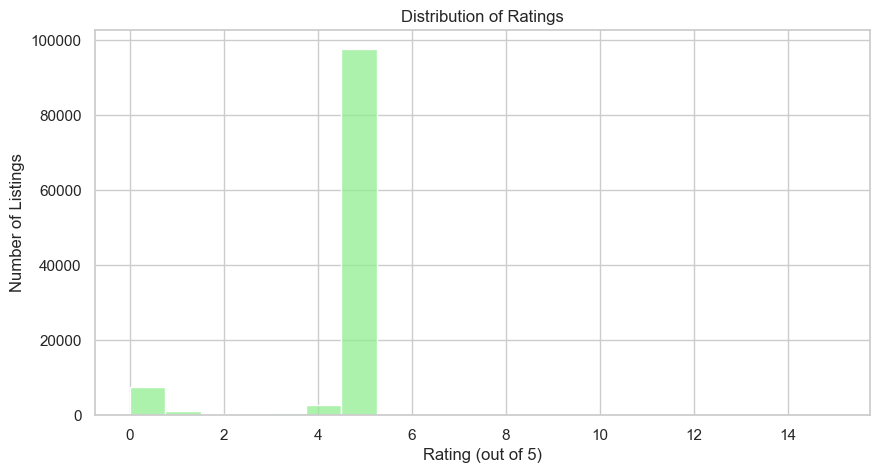

Average Rating across all listings: 4.53/5


In [29]:
#4.11 Distribution of Ratings
plt.figure(figsize=(10,5))
sns.histplot(df['Rating_clean'], bins=20, kde=False, color='lightgreen')
plt.title("Distribution of Ratings")
plt.xlabel("Rating (out of 5)")
plt.ylabel("Number of Listings")
plt.show()

# Average rating
avg_rating = df['Rating_clean'].mean()
print(f"Average Rating across all listings: {avg_rating:.2f}/5")


C:\Users\raksh\AppData\Local\Temp\ipykernel_20268\456106951.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_origins.index, y=top_origins.values, palette="Blues_d")


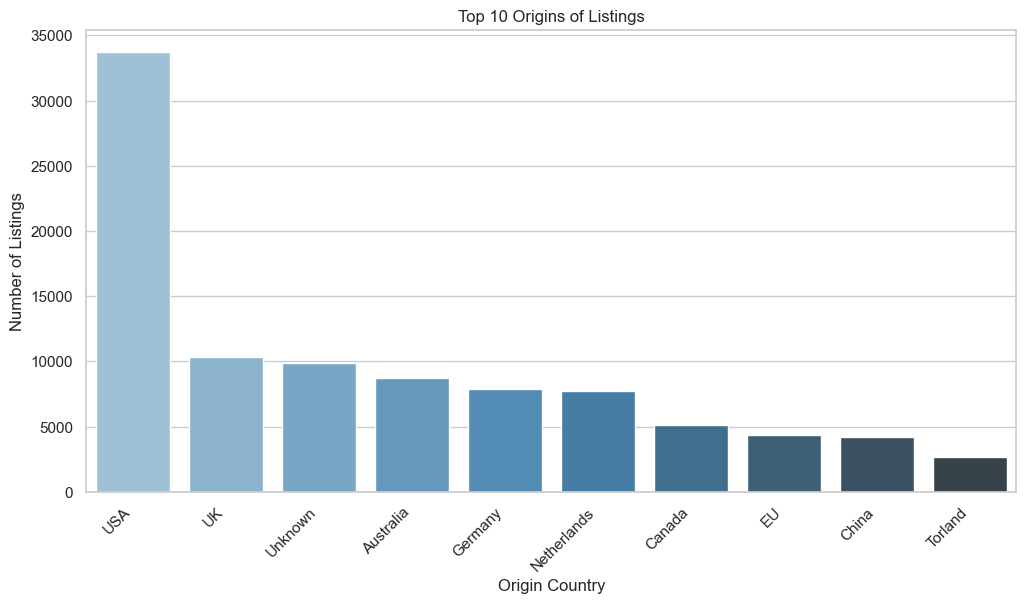

Top 10 Origins:
 Origin
USA            33729
UK             10336
Unknown         9874
Australia       8767
Germany         7876
Netherlands     7707
Canada          5126
EU              4356
China           4185
Torland         2705
Name: count, dtype: int64


In [30]:
#4.12 Top 10 Origins of Listings
top_origins = df['Origin'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_origins.index, y=top_origins.values, palette="Blues_d")
plt.title("Top 10 Origins of Listings")
plt.xlabel("Origin Country")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45, ha='right')
plt.show()

print("Top 10 Origins:\n", top_origins)


C:\Users\raksh\AppData\Local\Temp\ipykernel_20268\2240717778.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_destinations.index, y=top_destinations.values, palette="Reds_d")


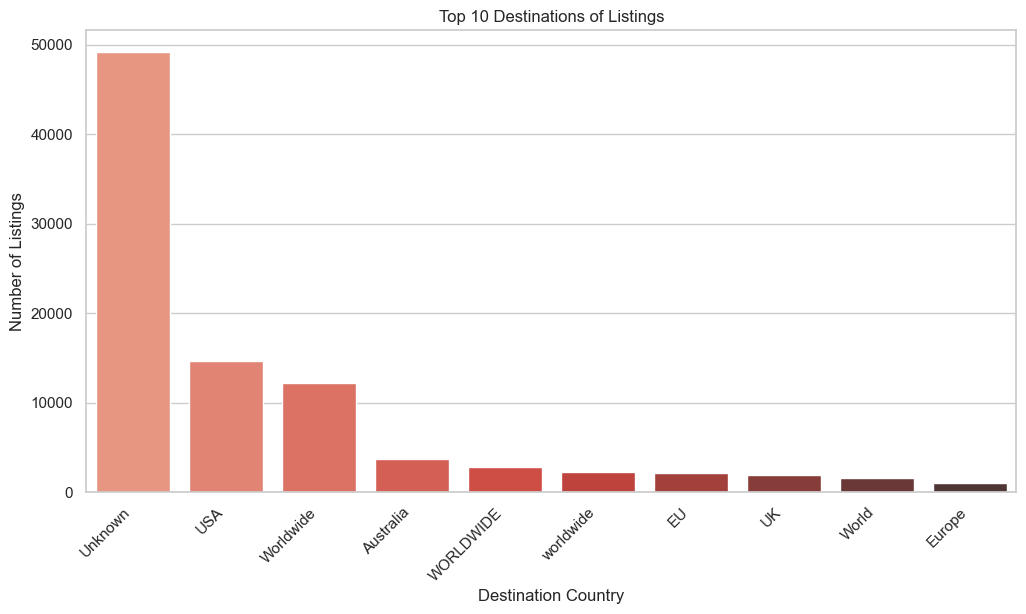

Top 10 Destinations:
 Destination
Unknown      49156
USA          14663
Worldwide    12200
Australia     3698
WORLDWIDE     2816
worldwide     2197
EU            2171
UK            1891
World         1589
Europe        1031
Name: count, dtype: int64


In [31]:
# 4.13 Top 10 Destinations of listings
top_destinations = df['Destination'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_destinations.index, y=top_destinations.values, palette="Reds_d")
plt.title("Top 10 Destinations of Listings")
plt.xlabel("Destination Country")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45, ha='right')
plt.show()

print("Top 10 Destinations:\n", top_destinations)


C:\Users\raksh\AppData\Local\Temp\ipykernel_20268\2366286246.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_category.index, y=avg_rating_category.values, palette="coolwarm")


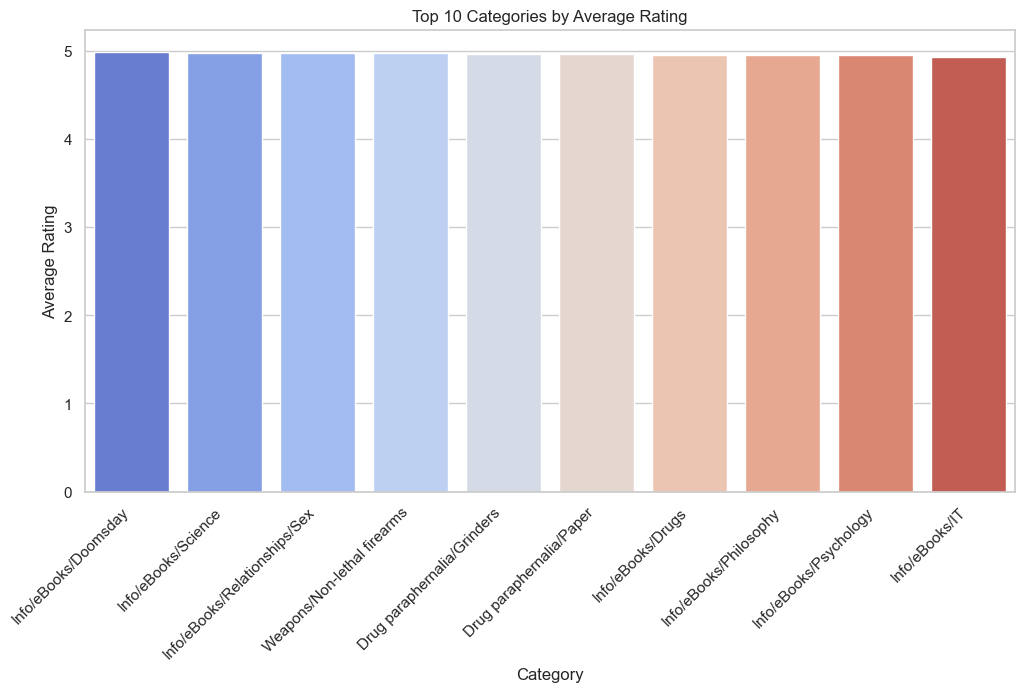

Average Rating per Category:
 Category
Info/eBooks/Doomsday             4.989070
Info/eBooks/Science              4.974656
Info/eBooks/Relationships/Sex    4.973972
Weapons/Non-lethal firearms      4.969368
Drug paraphernalia/Grinders      4.964019
Drug paraphernalia/Paper         4.961541
Info/eBooks/Drugs                4.951488
Info/eBooks/Philosophy           4.947200
Info/eBooks/Psychology           4.945000
Info/eBooks/IT                   4.932465
Name: Rating_clean, dtype: float64


In [32]:
# 4.14 Top 10 Categories by Average Rating
avg_rating_category = df.groupby('Category')['Rating_clean'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_rating_category.index, y=avg_rating_category.values, palette="coolwarm")
plt.title("Top 10 Categories by Average Rating")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha='right')
plt.show()

print("Average Rating per Category:\n", avg_rating_category)


In [33]:
# 5️⃣ Suspicious / Outlier Listings
# 5.1 High-priced Outliers (Top 1%)
high_price_threshold = df['Price_clean'].quantile(0.99)
suspicious_items = df[df['Price_clean'] > high_price_threshold]
suspicious_items[['Item', 'Category', 'Vendor', 'Price_clean']]

,Item,Category,Vendor,Price_clean
83,Have something to sell? got an idea?,Services/Other,optiman,4564.000000
667,5000g Ethylone E1 mdec,Drugs/RCs,ChinaChem,41.021815
1380,High Quality Counterfeit Bills $500,Counterfeits/Money,top_vendor1,60.367728
1538,HBO GO Account [LIFETIME + FREEBIES],Data/Accounts,thesecretsociety,1441.466549
4912,Anonymous land in Panama,Other,echo,21985.000000
...,...,...,...,...
107254,1g Raw LSD Xtal Asian xtal,Drugs/Psychedelics/LSD,aalbion,53.247513
107407,AUCTION 1LB/448 grams scleroteria (AKA magi...,Drugs/Psychedelics/Mushrooms,Houba,41018.909717
107408,Best Dutch MDMA Crystals x 5kg,Drugs/Ecstasy/MDMA,starbuy,354.411523
107729,Custom Order Alex_b,Drugs/Cannabis/Weed,Eisman,287.555700


In [34]:
# 5.2 Low-rated Items (Rating < 2)
low_rating_items = df[df['Rating_clean'] < 2]
low_rating_items[['Item', 'Category', 'Vendor', 'Rating_clean']]

,Item,Category,Vendor,Rating_clean
186,10g 4-mec 4mec similar to mephedrone (10 grams...,Drugs/RCs,nanosuit1,1.0
309,2.5g 4-mec 4mec similar to mephedrone (2.5 gra...,Drugs/RCs,nanosuit1,1.0
334,200mg 0.2g a-PVP sample great MDPV replacement,Drugs/RCs,nanosuit1,1.0
335,0.5g 4-mec 4mec similar to mephedrone (0.5 gra...,Drugs/RCs,nanosuit1,1.0
338,3.5g 4-mec 4mec similar to mephedrone (3.5 gra...,Drugs/RCs,nanosuit1,1.0
...,...,...,...,...
109665,Methadone,Drugs/Opioids/Opium,TheAmericanOutfit,0.0
109669,Refined Spanish Opium 1 gr,Drugs/Opioids/Opium,OPIOID5,0.0
109676,Shipping Ticket,Weapons/Fireworks,cheqdropz,0.0
109677,0.50 GRAMS #4 White Afghani Heroin - FULL ESCROW,Drugs/Opioids/Opium,SnowQueen,0.0


# **Summary**

# 📊6️⃣Agora Marketplace – Project Summary

## 🔎 Dataset Overview
The dataset contains listings from the **Agora darknet marketplace**, including details such as **Category, Vendor, Price, Rating, and Origin-Destination**.

**Data Cleaning Steps:**
- Converted **Price** into numeric values using regex.
- Removed missing/invalid entries for **Price** and **Rating**.
- Reset index and handled duplicates.
- Standardized values for consistency.

---

## 🔑 Key Insights from EDA

**1. Category Distribution:**  
The marketplace is dominated by **Drugs, Digital Goods, and Counterfeits**, showing the main focus areas.

**2. Top 10 Categories by Listings:**  
**Drugs** lead significantly, followed by other high-demand categories.

**3. Average Price by Category:**  
Premium categories such as **Weapons** and **Fraud Services** show higher average prices.

**4. Price Distribution:**  
Prices are **right-skewed**, with most items in the low-to-mid range and a few expensive outliers.

**5. Top 10 Vendors by Listings:**  
A **small group of vendors dominates** the platform, contributing disproportionately to total listings.

**6. Vendor Market Share:**  
“**Power vendors**” hold the majority share, while most vendors have very few listings.

**7. Unique Vendors per Category:**  
Some categories (like **Drugs**) have a wide vendor base, while niche categories remain monopolized.

**8. Vendor Specialization:**  
Some vendors focus on **one category**, while others diversify across multiple categories.

**9. Price vs Rating:**  
Higher price does **not strongly correlate** with higher rating; affordable items are still highly trusted.

**10. Rating Distribution:**  
Most items are rated **4–5 stars**, indicating customer trust and satisfaction.

**11. Suspicious Outliers:**  
- High-priced luxury/scam-like items detected in the **top 1%**.  
- Very few items received ratings below 2, marking **potential risks**.

**12. Origin–Destination Patterns:**  
Trade routes reveal **major source and demand regions**, indicating established supply chains.

**13. Correlation Analysis:**  
Weak correlation between **Price and Rating**, but vendor activity aligns with category dominance.

**14. Temporal Trends:**  
Activity shows **spikes in certain periods**, suggesting seasonal or event-driven demand.

---

## ⚠️ Risks & Red Flags
- **High-priced outliers** suggest possible scams or rare luxury listings.  
- **Low-rated items** point to poor quality or fraudulent vendors.  
- **Vendor monopolization** in some categories indicates uneven competition.

---

## ✅ Conclusion
The 14-step EDA provides a **comprehensive view** of the Agora darknet marketplace:

- **Categories:** Marketplace is heavily concentrated in **illicit drug trade and digital goods**.  
- **Vendors:** A handful of dominant vendors control **market share**.  
- **Pricing:** Majority of products are **affordable**, but niche categories show **extreme outliers**.  
- **Customer Behavior:** Ratings are overwhelmingly positive, indicating **trust even in illicit markets**.  
- **Suspicious Activity:** Outliers and vendor concentration highlight **risks and unusual patterns**.

This analysis demonstrates how **data cleaning, visualization, and statistical methods** can uncover **market dynamics, vendor dominance, pricing behavior, and customer trust patterns** in hidden online marketplaces.


# **Conclusion to the Cybercrime Underground Economy**

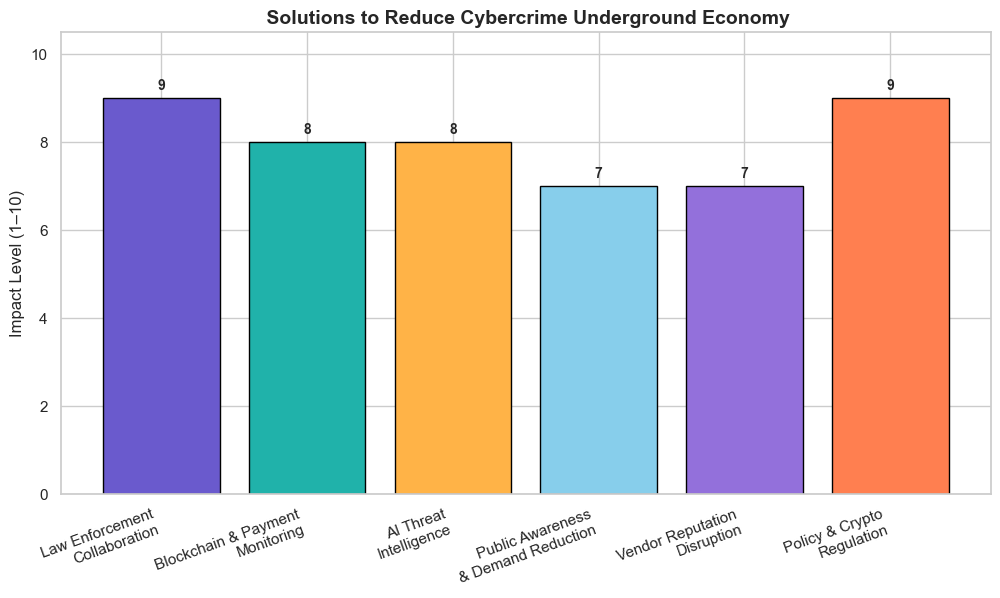

In [35]:
import matplotlib.pyplot as plt

# Solutions
solutions = [
    "Law Enforcement\nCollaboration",
    "Blockchain & Payment\nMonitoring",
    "AI Threat\nIntelligence",
    "Public Awareness\n& Demand Reduction",
    "Vendor Reputation\nDisruption",
    "Policy & Crypto\nRegulation"
]

# Importance / Impact score (arbitrary weights for visualization)
impact_scores = [9, 8, 8, 7, 7, 9]

# Colors (mild but professional)
colors = ["#6A5ACD", "#20B2AA", "#FFB347", "#87CEEB", "#9370DB", "#FF7F50"]

plt.figure(figsize=(12,6))
bars = plt.bar(solutions, impact_scores, color=colors, edgecolor="black")

# Add text labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.2,
             f'{height}', ha='center', fontsize=10, fontweight='bold')

# Title & labels
plt.title(" Solutions to Reduce Cybercrime Underground Economy", fontsize=14, fontweight='bold')
plt.ylabel("Impact Level (1–10)", fontsize=12)
plt.ylim(0, 10.5)
plt.xticks(rotation=20, ha='right')

plt.show()
